<a href="https://colab.research.google.com/github/abdifatahmain/dataVIZ/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [8]:
from google.colab import files
upload = files.upload()

Saving merged_data.csv to merged_data (1).csv


In [9]:
df = pd.read_csv('merged_data.csv')

In [10]:
df.shape

(420768, 18)

In [11]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [13]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [14]:
print ('Percentage/Null',round(df.isnull().sum()/len(df.index), 2)*100)

Percentage/Null No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      2.0
PM10       2.0
SO2        2.0
NO2        3.0
CO         5.0
O3         3.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64


In [15]:
df.drop(["No"], axis=1, inplace=True)

In [16]:
def fill_missing_values_by_month(df, columns_to_fill):
    """
    Fill missing values in specified columns based on monthly averages.
    If monthly average is not available, uses overall average.

    Parameters:
    df (pd.DataFrame): Input dataframe with year, month columns
    columns_to_fill (list): List of column names to process

    Returns:
    pd.DataFrame: DataFrame with filled missing values
    """
    # Create a copy to avoid modifying original data
    data = df.copy()

    # For each month and column combination
    for month in data['month'].unique():
        month_mask = data['month'] == month
        month_data = data[month_mask]

        for column in columns_to_fill:
            # Calculate monthly average
            month_mean = month_data[column].mean()

            # If monthly average exists, use it; otherwise use overall average
            if pd.notna(month_mean):
                fill_value = round(month_mean, 2)
                print(f"Month {month}: Filling {column} with monthly average {fill_value}")
            else:
                overall_mean = round(df[column].mean(), 2)
                fill_value = overall_mean
                print(f"Month {month}: Filling {column} with overall average {fill_value}")

            # Fill missing values for this month and column
            data.loc[month_mask, column] = data.loc[month_mask, column].fillna(fill_value)

    return data

# Define columns to process based on your numeric columns with missing values
columns_to_fill = [
    "PM2.5", "PM10", "SO2", "NO2", "CO", "O3",
    "TEMP", "PRES", "DEWP", "RAIN", "WSPM"
]

# Process the data
cleaned_data = fill_missing_values_by_month(df, columns_to_fill)

# Verify the results
print("\nMissing values after filling:")
print(cleaned_data[columns_to_fill].isnull().sum())

Month 3: Filling PM2.5 with monthly average 94.66
Month 3: Filling PM10 with monthly average 136.04
Month 3: Filling SO2 with monthly average 28.0
Month 3: Filling NO2 with monthly average 60.12
Month 3: Filling CO with monthly average 1310.23
Month 3: Filling O3 with monthly average 51.04
Month 3: Filling TEMP with monthly average 8.35
Month 3: Filling PRES with monthly average 1013.96
Month 3: Filling DEWP with monthly average -7.95
Month 3: Filling RAIN with monthly average 0.01
Month 3: Filling WSPM with monthly average 1.98
Month 4: Filling PM2.5 with monthly average 72.73
Month 4: Filling PM10 with monthly average 116.96
Month 4: Filling SO2 with monthly average 14.22
Month 4: Filling NO2 with monthly average 47.28
Month 4: Filling CO with monthly average 840.49
Month 4: Filling O3 with monthly average 70.19
Month 4: Filling TEMP with monthly average 15.33
Month 4: Filling PRES with monthly average 1008.31
Month 4: Filling DEWP with monthly average 0.19
Month 4: Filling RAIN with

In [17]:
def fill_missing_categorical_by_station(df, columns_to_fill):
    """
    Fill missing values in categorical columns based on station-specific modes.

    Parameters:
    df (pd.DataFrame): Input dataframe with 'station' column
    columns_to_fill (list): List of categorical column names to process

    Returns:
    pd.DataFrame: DataFrame with filled missing values
    """
    # Create a copy to avoid modifying original data
    data = df.copy()

    # For each station and column combination
    for station in data['station'].unique():
        station_mask = data['station'] == station
        station_data = data[station_mask]

        for column in columns_to_fill:
            # Calculate station-specific mode
            # Using pandas mode() instead of statistics.mode for better handling of ties
            mode_value = station_data[column].mode()

            if not mode_value.empty:
                # Take first mode if multiple exist
                fill_value = mode_value.iloc[0]
                print(f"Station {station}: Filling {column} with mode {fill_value}")

                # Fill missing values for this station and column
                data.loc[station_mask, column] = data.loc[station_mask, column].fillna(fill_value)
            else:
                # If no mode found for station, use overall mode
                overall_mode = data[column].mode().iloc[0]
                print(f"Station {station}: Filling {column} with overall mode {overall_mode}")
                data.loc[station_mask, column] = data.loc[station_mask, column].fillna(overall_mode)

    return data

# Define categorical columns to process
categorical_columns = ['wd']  # Updated to match your column name

# Process the data
cleaned_data = fill_missing_categorical_by_station(df, categorical_columns)

# Verify the results
print("\nMissing values after filling:")
print(cleaned_data[categorical_columns].isnull().sum())

Station Shunyi: Filling wd with mode NNE
Station Wanshouxigong: Filling wd with mode NE
Station Guanyuan: Filling wd with mode NE
Station Tiantan: Filling wd with mode ENE
Station Nongzhanguan: Filling wd with mode ENE
Station Wanliu: Filling wd with mode NE
Station Changping: Filling wd with mode NNW
Station Gucheng: Filling wd with mode N
Station Aotizhongxin: Filling wd with mode NE
Station Dongsi: Filling wd with mode ENE
Station Dingling: Filling wd with mode NNW
Station Huairou: Filling wd with mode NW

Missing values after filling:
wd    0
dtype: int64


In [18]:
numeric_columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3",
                  "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
data_numeric_filled = fill_missing_values_by_month(df, numeric_columns)

# Then fill categorical columns
categorical_columns = ['wd']
final_cleaned_data = fill_missing_categorical_by_station(data_numeric_filled, categorical_columns)

# Verify all missing values have been handled
print("\nFinal missing value count:")
print(final_cleaned_data.isnull().sum())

Month 3: Filling PM2.5 with monthly average 94.66
Month 3: Filling PM10 with monthly average 136.04
Month 3: Filling SO2 with monthly average 28.0
Month 3: Filling NO2 with monthly average 60.12
Month 3: Filling CO with monthly average 1310.23
Month 3: Filling O3 with monthly average 51.04
Month 3: Filling TEMP with monthly average 8.35
Month 3: Filling PRES with monthly average 1013.96
Month 3: Filling DEWP with monthly average -7.95
Month 3: Filling RAIN with monthly average 0.01
Month 3: Filling WSPM with monthly average 1.98
Month 4: Filling PM2.5 with monthly average 72.73
Month 4: Filling PM10 with monthly average 116.96
Month 4: Filling SO2 with monthly average 14.22
Month 4: Filling NO2 with monthly average 47.28
Month 4: Filling CO with monthly average 840.49
Month 4: Filling O3 with monthly average 70.19
Month 4: Filling TEMP with monthly average 15.33
Month 4: Filling PRES with monthly average 1008.31
Month 4: Filling DEWP with monthly average 0.19
Month 4: Filling RAIN with

In [19]:
def create_daytime_features(df):
    data = df.copy()  # helps avoid modifying orginal data
    data['datetime'] = pd.to_datetime(
        data[['year', 'month', 'day', 'hour']].assign(hour=data['hour']),
        format='%Y-%m-%d %H'
    )
    data['date'] = data['datetime'].dt.date
    data['dayofweek'] = data['datetime'].dt.dayofweek
    data['is_weekend'] = data['dayofweek'].isin([5, 6]).astype(int)
    data['season'] = data['datetime'].dt.month.map({
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
    })

    print("Created datetime features:")
    print(f"- datetime: full timestamp")
    print(f"- date: date without time")
    print(f"- dayofweek: 0 (Monday) to 6 (Sunday)")
    print(f"- is_weekend: binary indicator")
    print(f"- season: categorical season name")

    return data

In [20]:
df_with_dates = create_daytime_features(df)

print("\nSample of new datetime features:")
print(df_with_dates[['datetime', 'date', 'dayofweek', 'is_weekend', 'season']].tail())

Created datetime features:
- datetime: full timestamp
- date: date without time
- dayofweek: 0 (Monday) to 6 (Sunday)
- is_weekend: binary indicator
- season: categorical season name

Sample of new datetime features:
                  datetime        date  dayofweek  is_weekend  season
420763 2017-02-28 19:00:00  2017-02-28          1           0  Winter
420764 2017-02-28 20:00:00  2017-02-28          1           0  Winter
420765 2017-02-28 21:00:00  2017-02-28          1           0  Winter
420766 2017-02-28 22:00:00  2017-02-28          1           0  Winter
420767 2017-02-28 23:00:00  2017-02-28          1           0  Winter


In [27]:
def plot_histogram(df, columns, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
    axes = axes.ravel()

    for idx, col in enumerate(columns):
        sns.histplot(data=df, x=col, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

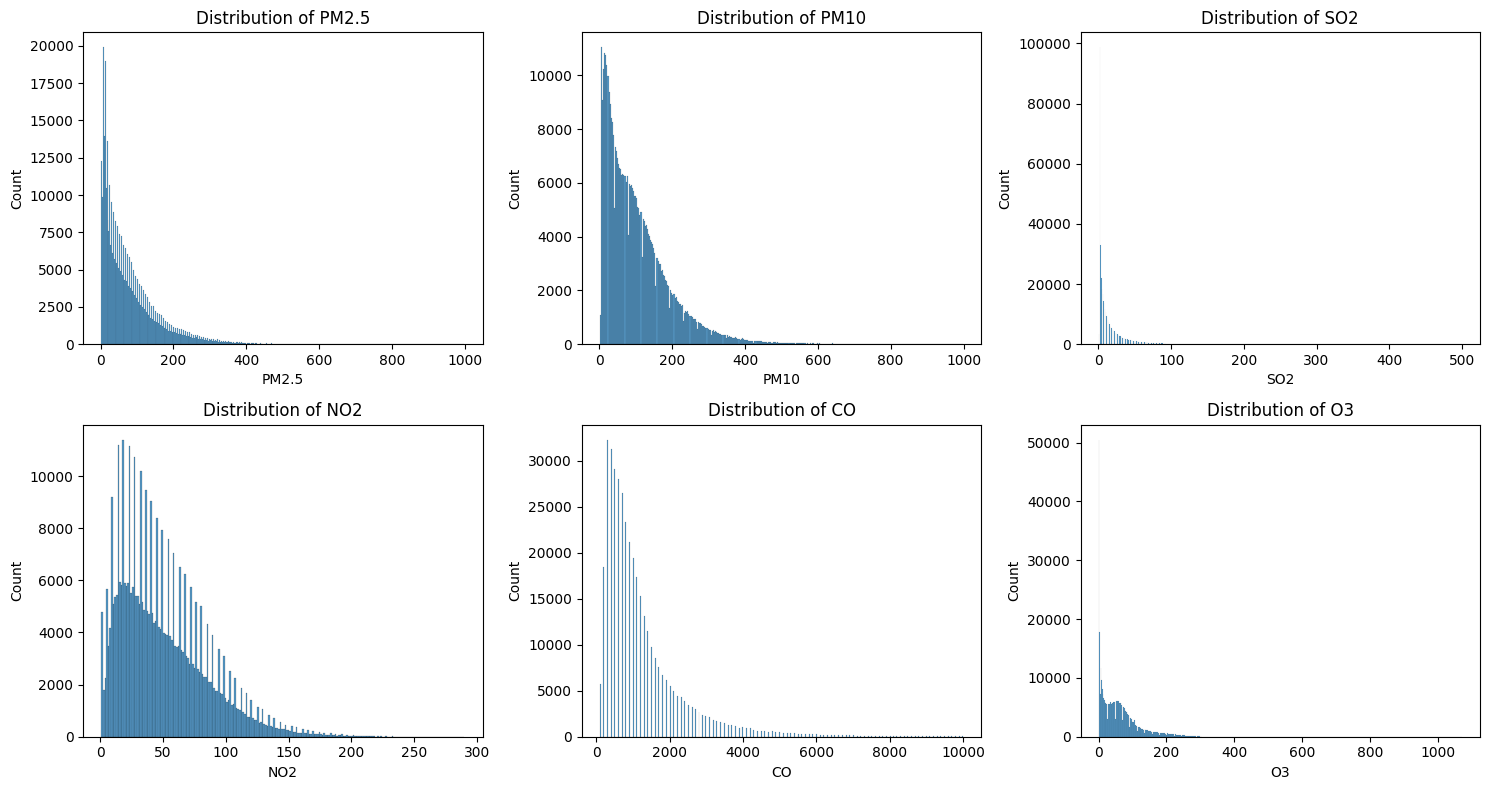

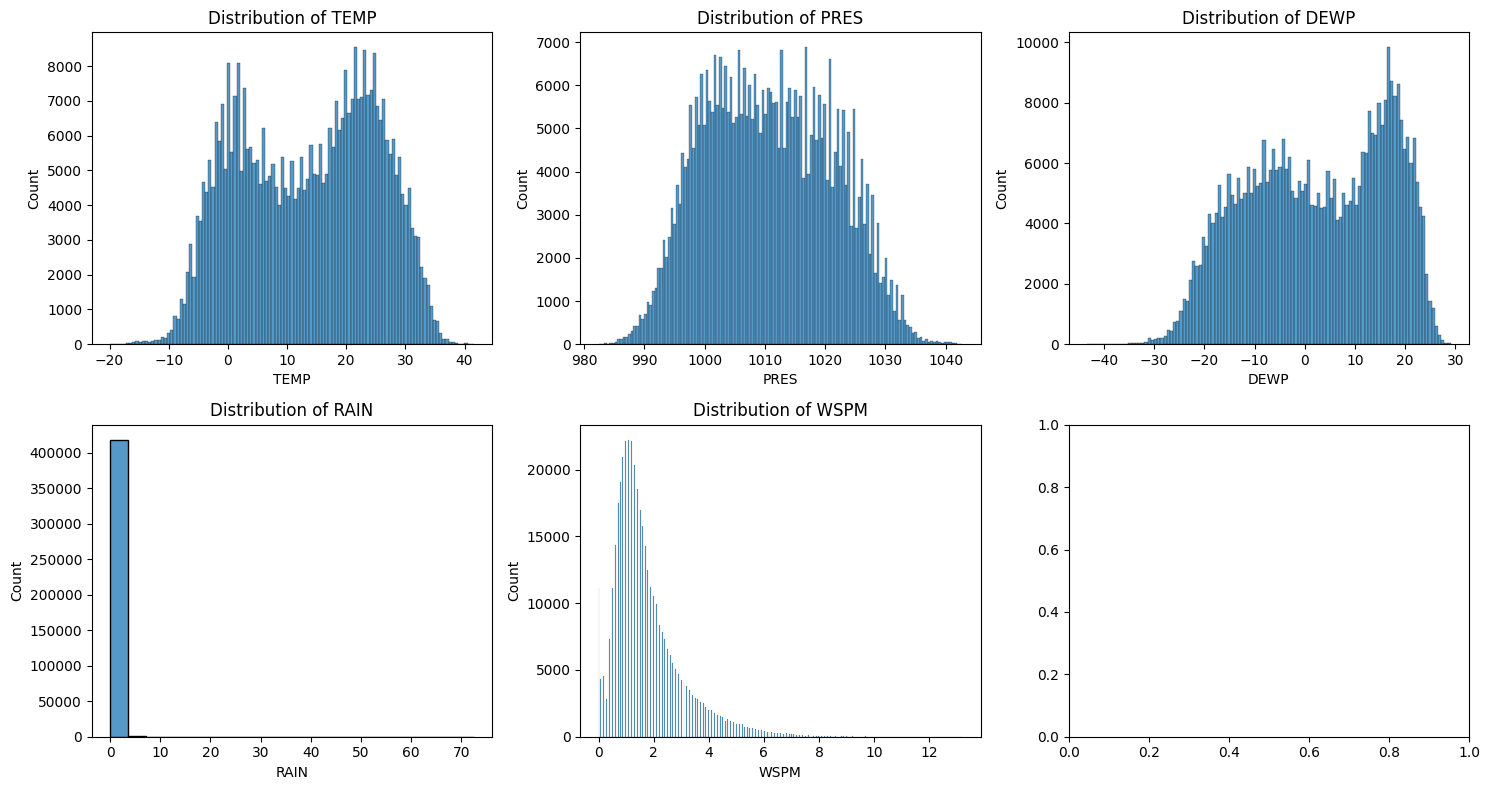

In [22]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
plot_histogram(df, pollutants, 2, 3)
weather_params = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
plot_histogram(df, weather_params, 2, 3)

In [23]:
def plot_scatter(df, x_var, y_vars, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
    axes = axes.ravel()

    for idx, y_var in enumerate(y_vars):
        sns.scatterplot(data=df, x=x_var, y=y_var, ax=axes[idx], alpha=0.5)
        axes[idx].set_title(f'{x_var} vs {y_var}')

    plt.tight_layout()
    plt.show()

data analysis and vis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


In [25]:
df.drop(["year","month","day","hour"],
axis=1).describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


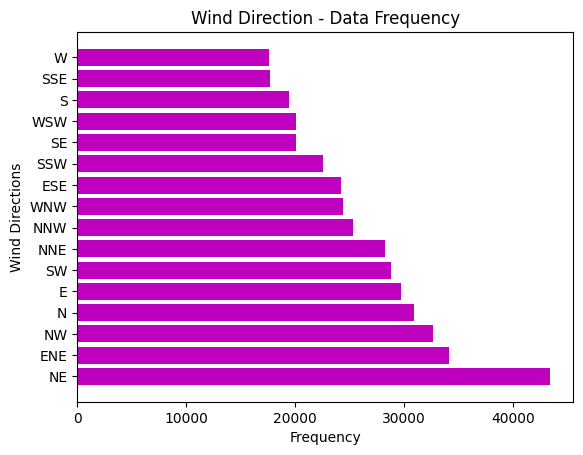

Number of Wind Direction 
wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64


In [28]:
plt.figure()
plt.barh(df["wd"].value_counts().index, df["wd"].value_counts(), color = "m")
plt.xlabel("Frequency")
plt.ylabel("Wind Directions")
plt.title("Wind Direction - Data Frequency")
plt.show()
print(f"Number of Wind Direction \n{df['wd'].value_counts()}")

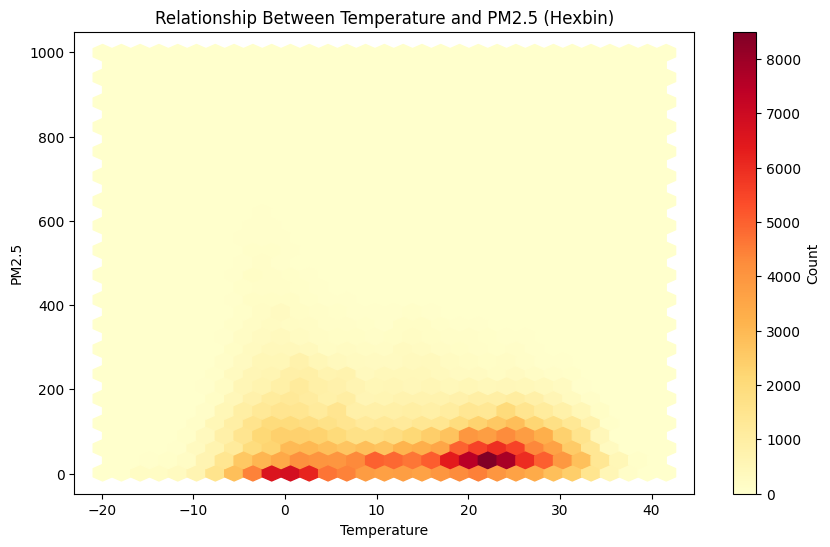

In [29]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['TEMP'], df['PM2.5'], gridsize=30, cmap='YlOrRd')
plt.colorbar(label='Count')
plt.xlabel('Temperature')
plt.ylabel('PM2.5')
plt.title('Relationship Between Temperature and PM2.5 (Hexbin)')
plt.show()

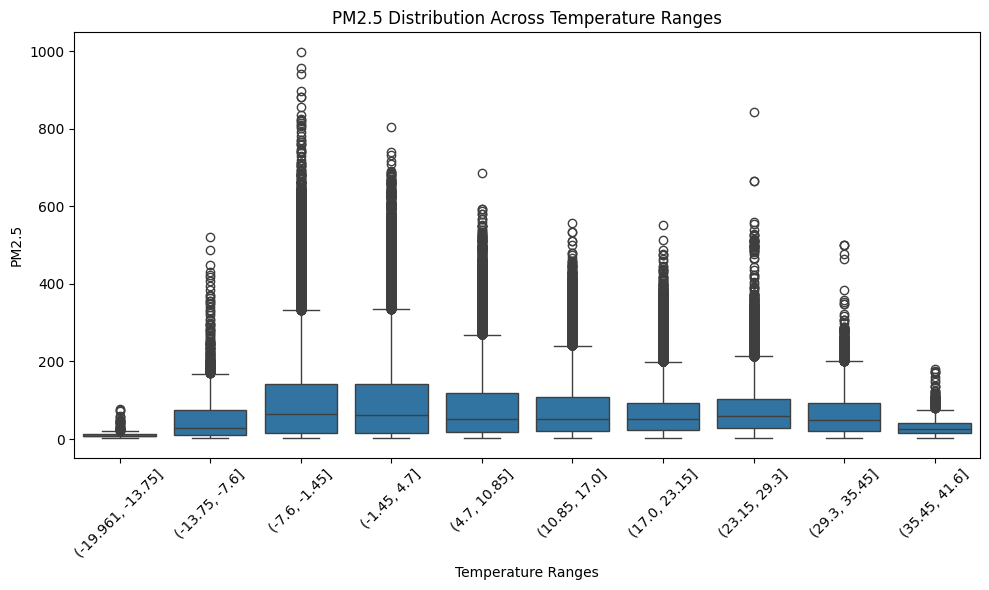

In [30]:
data = df

plt.figure(figsize=(10, 6))
# Create temperature bins
data['temp_bins'] = pd.cut(data['TEMP'], bins=10)
sns.boxplot(x='temp_bins', y='PM2.5', data=data)
plt.xticks(rotation=45)
plt.xlabel('Temperature Ranges')
plt.ylabel('PM2.5')
plt.title('PM2.5 Distribution Across Temperature Ranges')
plt.tight_layout()
plt.show()

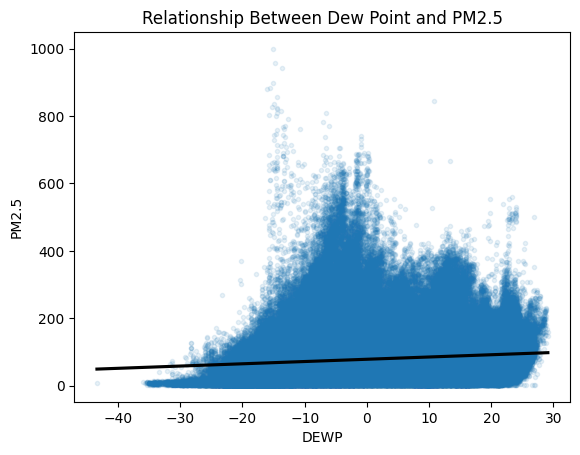

In [31]:
sns.regplot(x='DEWP', y='PM2.5', data=df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"black"})
plt.title('Relationship Between Dew Point and PM2.5')
plt.show()

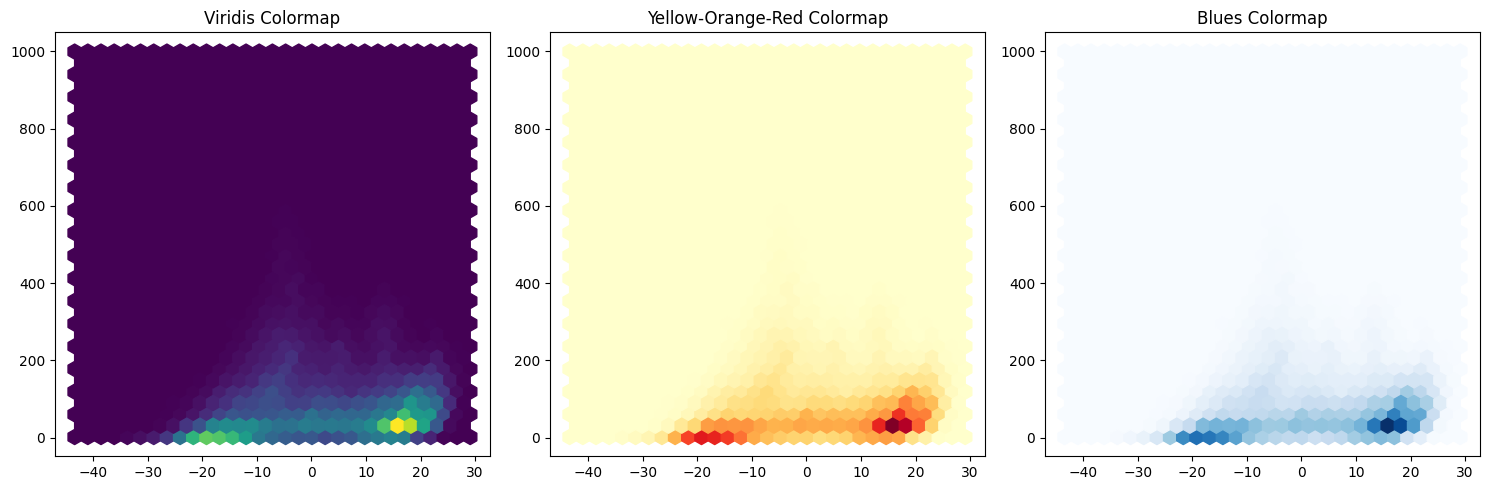

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hexbin(df['DEWP'], df['PM2.5'], gridsize=30, cmap='viridis')
plt.title('Viridis Colormap')

plt.subplot(132)
plt.hexbin(df['DEWP'], df['PM2.5'], gridsize=30, cmap='YlOrRd')
plt.title('Yellow-Orange-Red Colormap')

plt.subplot(133)
plt.hexbin(df['DEWP'], df['PM2.5'], gridsize=30, cmap='Blues')
plt.title('Blues Colormap')

plt.tight_layout()
plt.show()

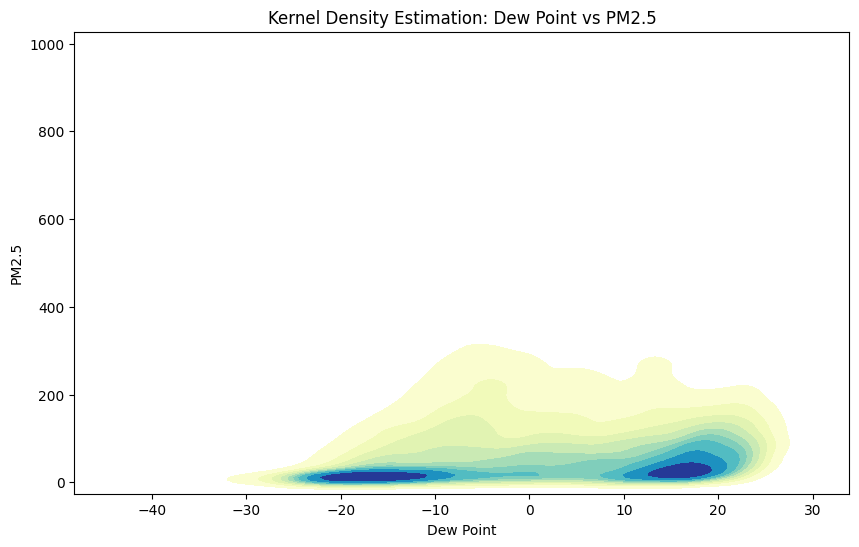

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['DEWP'], y=df['PM2.5'], cmap='YlGnBu', fill=True)
plt.xlabel('Dew Point')
plt.ylabel('PM2.5')
plt.title('Kernel Density Estimation: Dew Point vs PM2.5')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


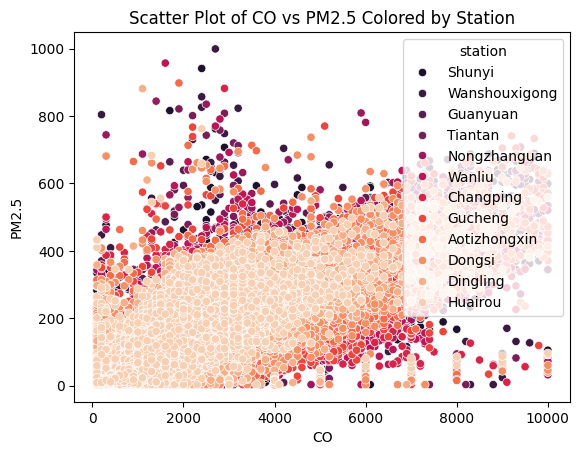

In [41]:
sns.scatterplot(x='CO', y='PM2.5', hue='station', data=data, palette="rocket")
plt.title('Scatter Plot of CO vs PM2.5 Colored by Station')
plt.show()

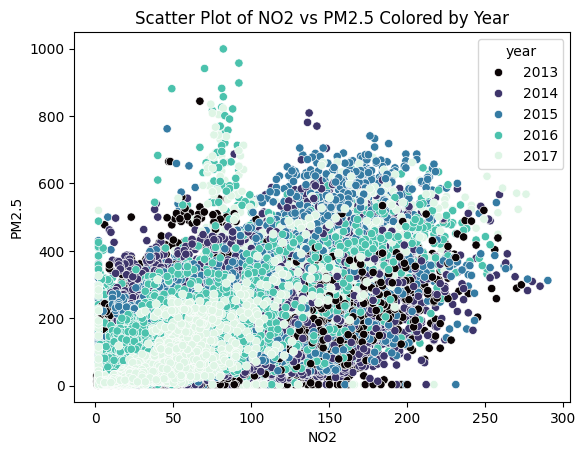

In [43]:
sns.scatterplot(x='NO2', y='PM2.5', hue='year', data=data, palette="mako")
plt.title('Scatter Plot of NO2 vs PM2.5 Colored by Year')
plt.show()

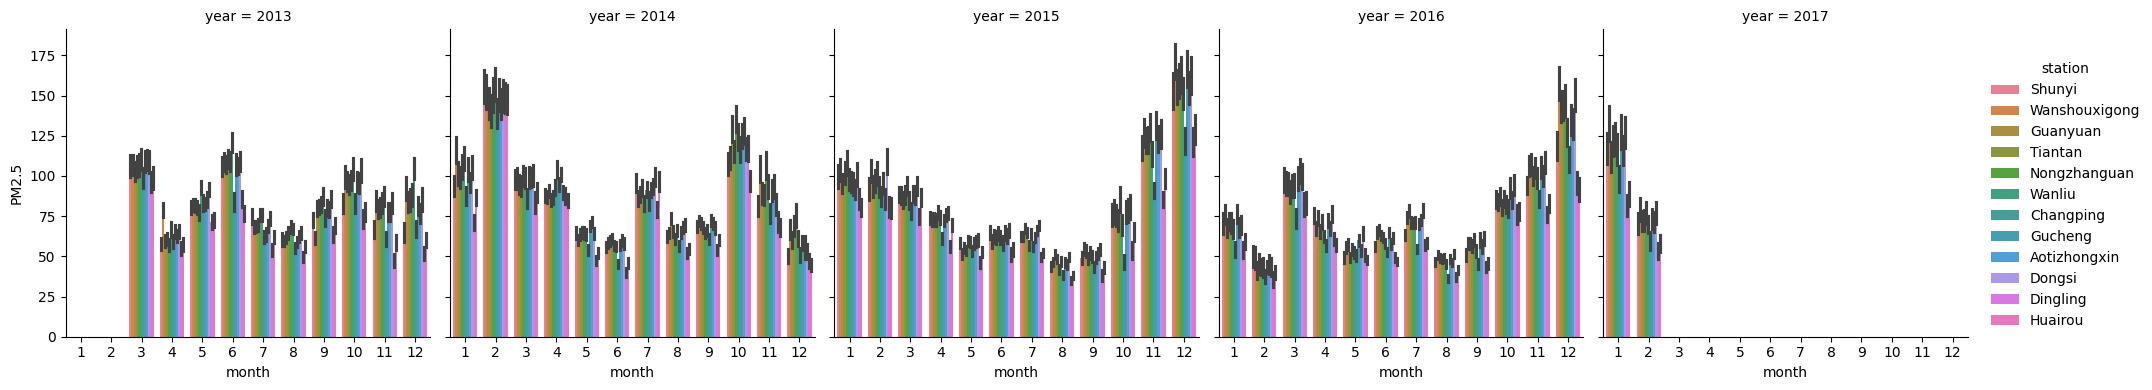

In [48]:
sns.catplot(x="month", y="PM2.5",  hue="station", col="year",
                data=data, kind="bar", height=4)
plt.show()

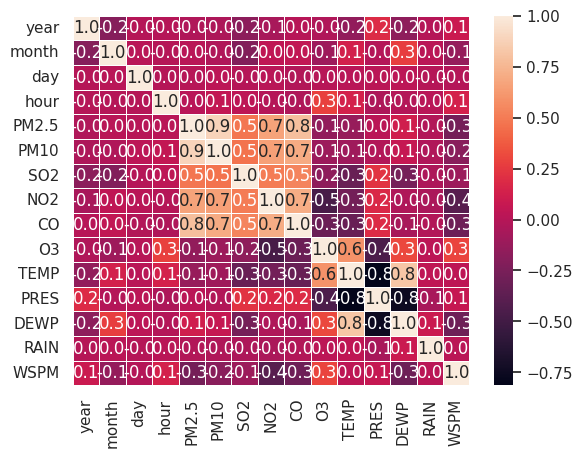

In [58]:

numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, linewidths=.5, fmt='.1f')
plt.show()

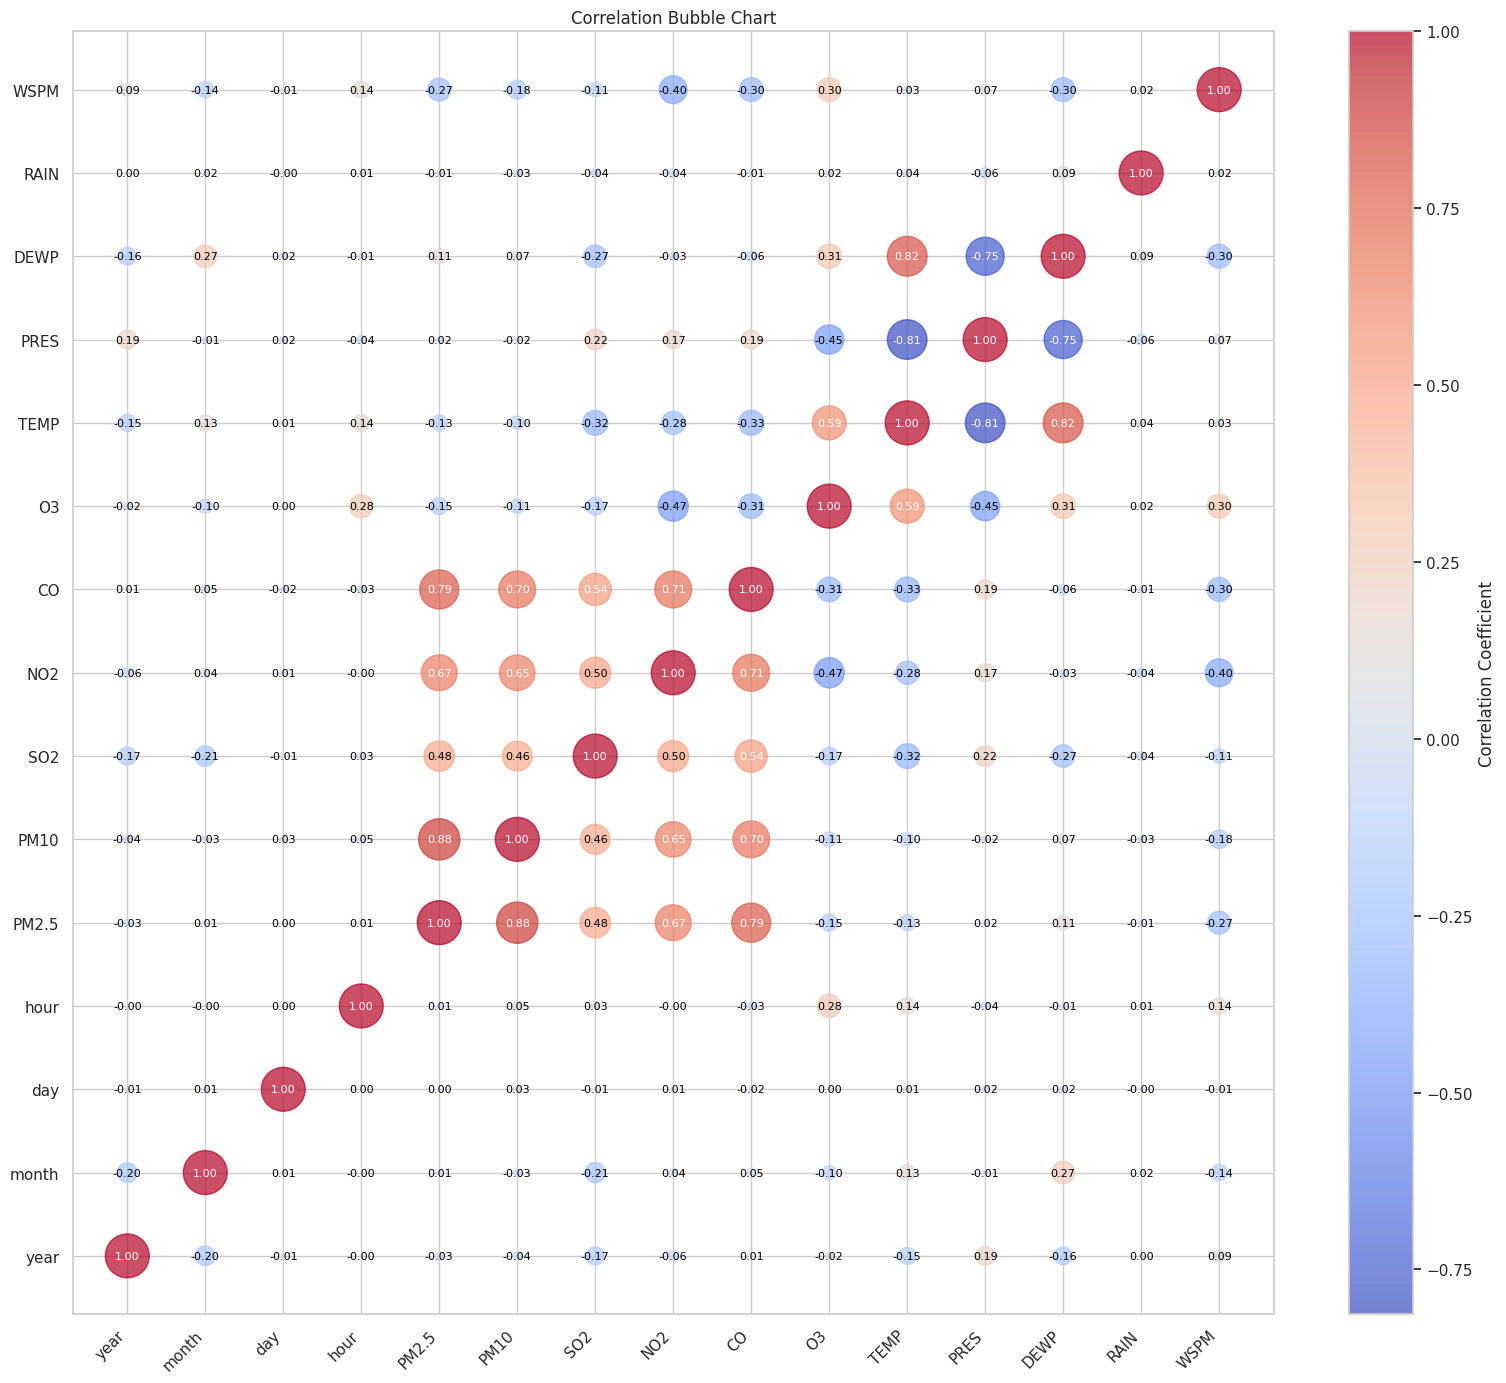

In [59]:
# Select numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Create the bubble chart
plt.figure(figsize=(16, 14))

# Get the variable names
variables = correlation_matrix.columns

# Create a meshgrid of coordinates
x, y = np.meshgrid(range(len(variables)), range(len(variables)))

# Flatten the coordinates and correlation values
x_flat = x.flatten()
y_flat = y.flatten()
correlation_flat = correlation_matrix.values.flatten()

# Create the bubble plot
scatter = plt.scatter(x_flat, y_flat,
            s=np.abs(correlation_flat) * 1000,  # Size of bubbles based on absolute correlation
            c=correlation_flat,  # Color based on correlation value
            cmap='coolwarm',  # Color map that shows positive and negative correlations
            alpha=0.7)

# Customize the plot
plt.colorbar(scatter, label='Correlation Coefficient')
plt.xticks(range(len(variables)), variables, rotation=45, ha='right')
plt.yticks(range(len(variables)), variables)
plt.title('Correlation Bubble Chart')

# Add correlation values as text
for i in range(len(variables)):
    for j in range(len(variables)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                 ha='center', va='center',
                 color='black' if abs(correlation_matrix.iloc[i, j]) < 0.5 else 'white',
                 fontsize=8)

plt.tight_layout()
plt.show()

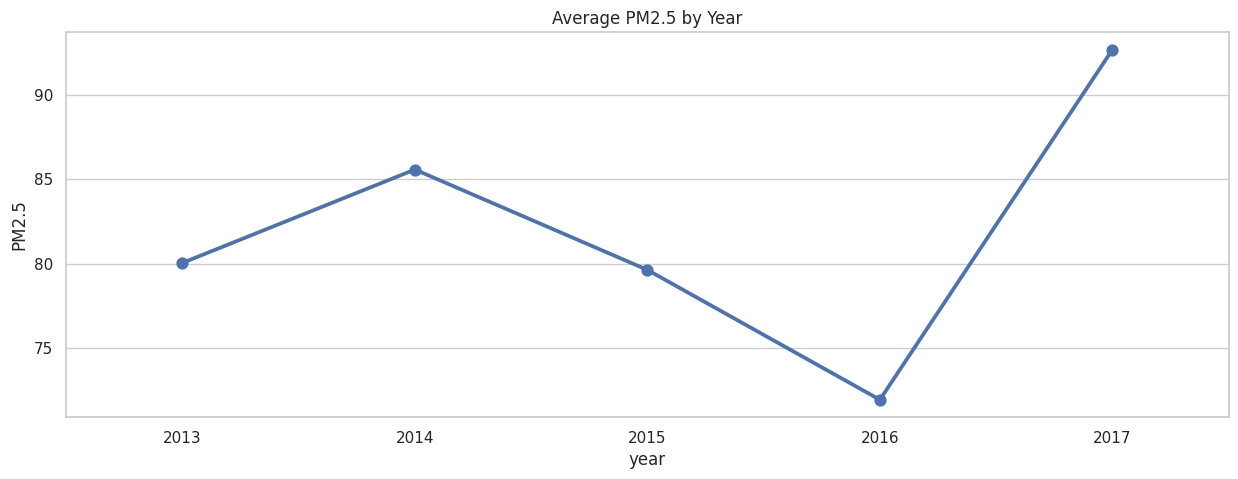

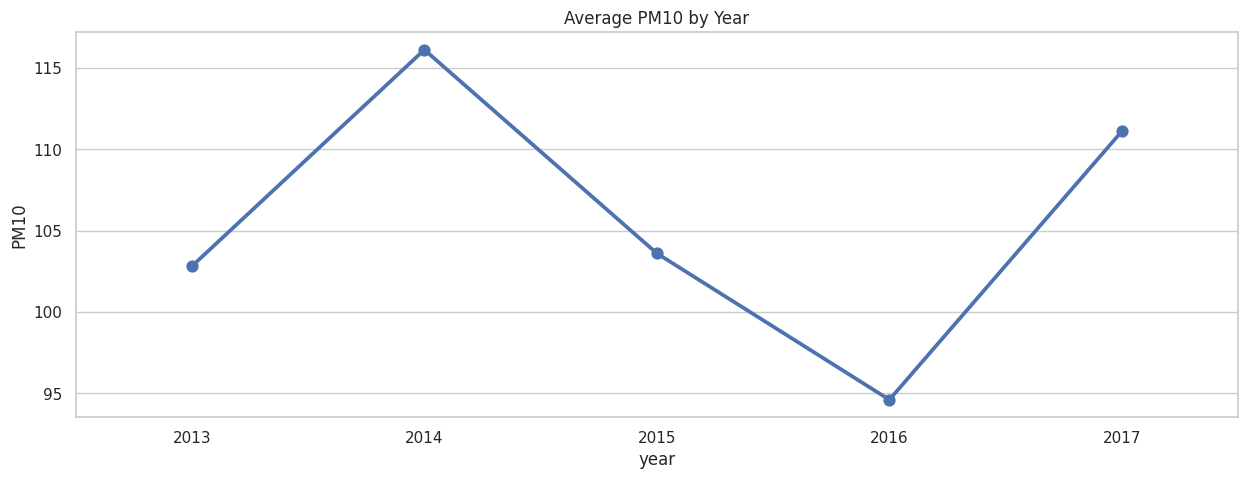

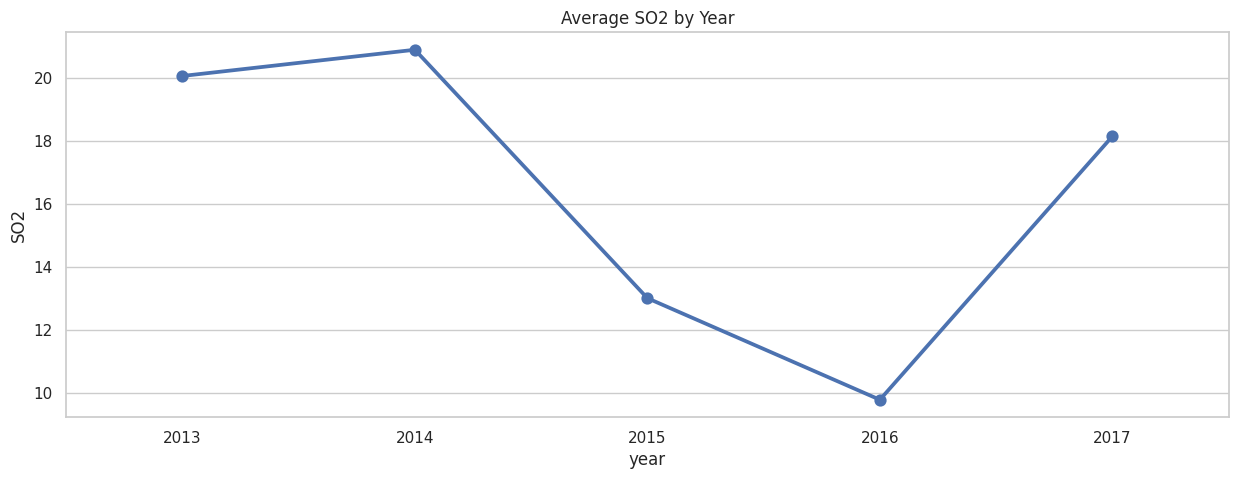

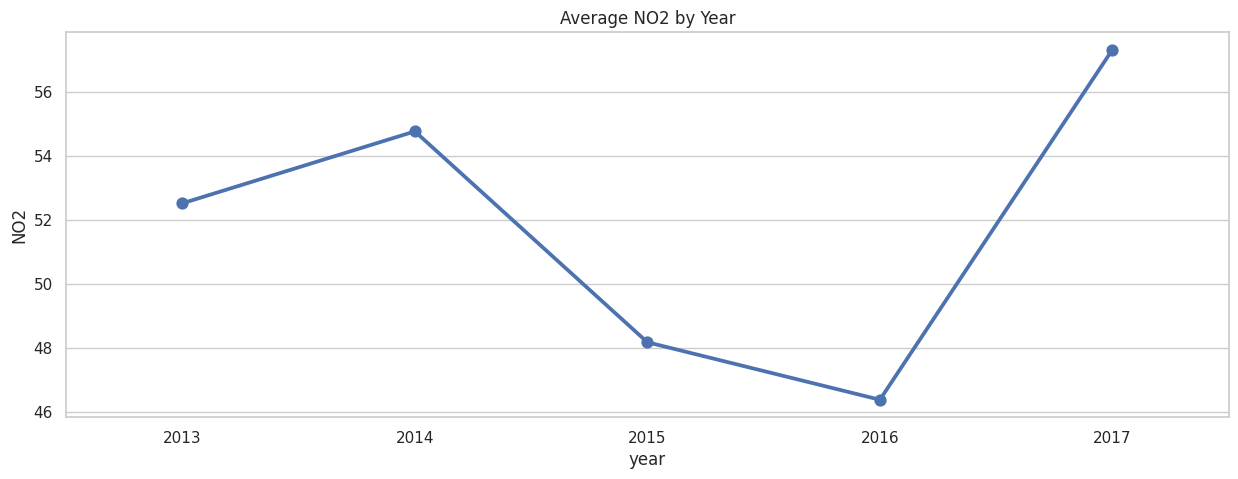

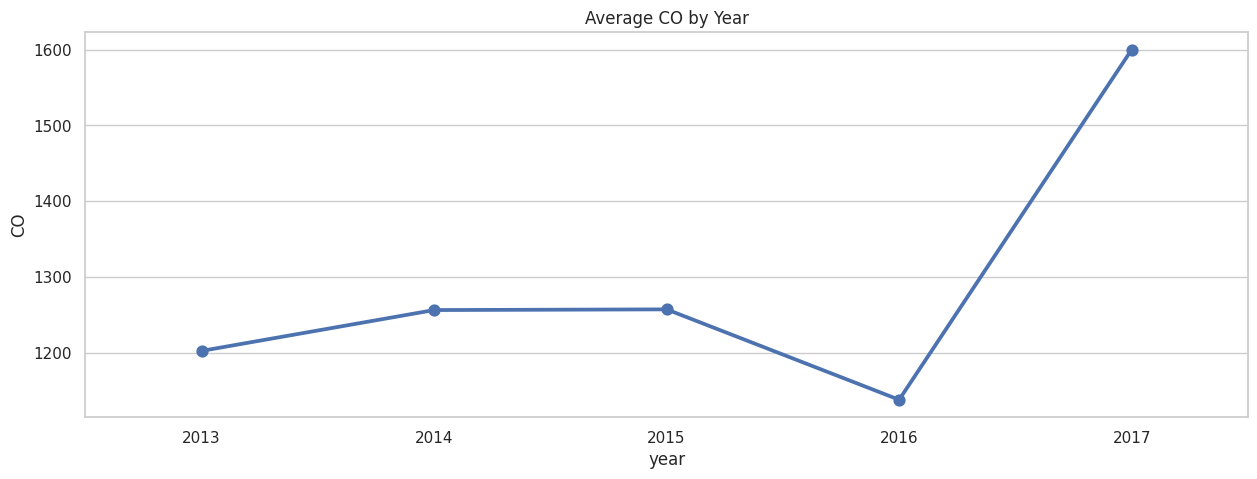

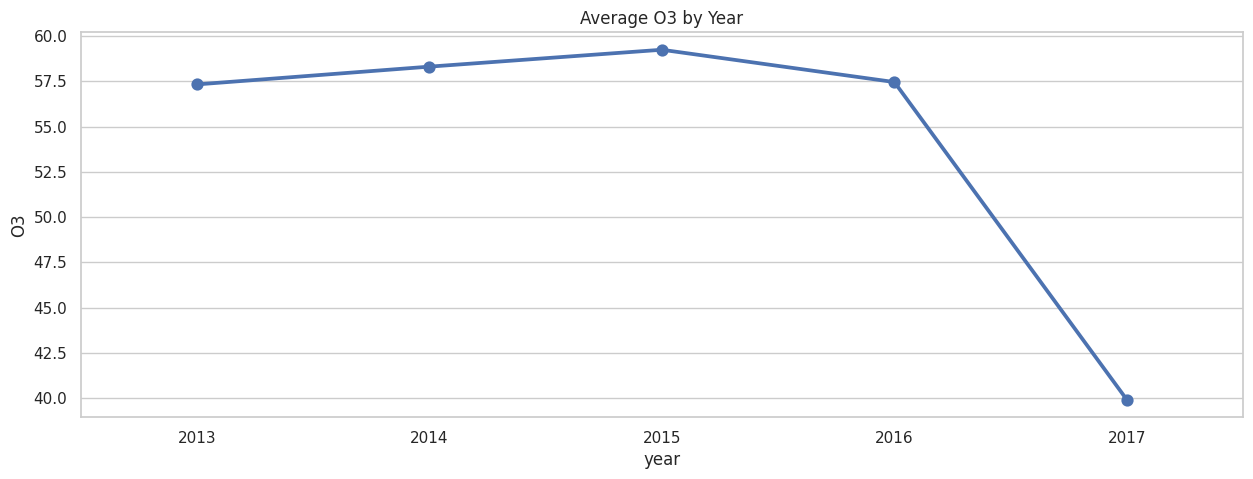

In [50]:
compounds = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
for i in compounds:
   compound_df = df[[i, 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)
   f, ax = plt.subplots(figsize=(15, 5))
   sns.pointplot(x='year', y=i, data=compound_df)
   plt.title(f'Average {i} by Year')
   plt.show()

In [69]:
def plot_compound_monthly_trends(data,compo) :
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    fix, axes = pltsubplot(len(compounds), 1, figsize=(15, 5*len(compo)))

    if len(compounds)==1:
        axes = [axes]

    for idx, compound in enumerate(compounds):
        temp_df = data.copy()
        temp_df['month'] = temp_df['month'].replace( # Corrected indentation here
            {i+1: month for i, month in enumerate(month_order)}
        )
        df = temp_df[[compound, 'month', 'year']].groupby(['year', 'month']).mean().reset_index() #changed temp_data to temp_df
        df.sort_values(['year', 'month'], ascending=[False, True], inplace=True)
        sns.lineplot(
            x='year',  # Changed 'Year' to 'year' for consistency
            y=compound,
            hue='month',  # Changed 'Month' to 'month' for consistency
            data=df,
            ax=axes[idx],
            marker='o',
            palette='Set2',
            hue_order=month_order
        )
        axes[idx].set_title(f'{compound} Monthly Trends')
        axes[idx].set_xlabel('Year')
        axes[idx].set_ylabel(f'{compound} Concentration')
        # Rotate x-axis labels if needed
        axes[idx].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()
    plt.show()
